In [5]:
%pip install -r requirements.txt
%pip install certifi


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


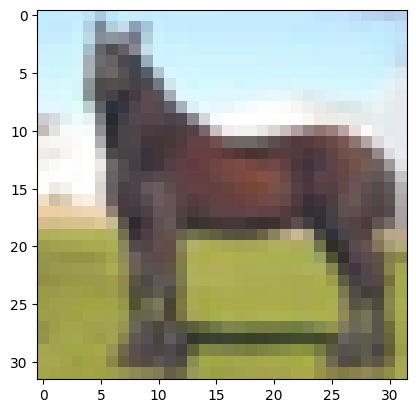

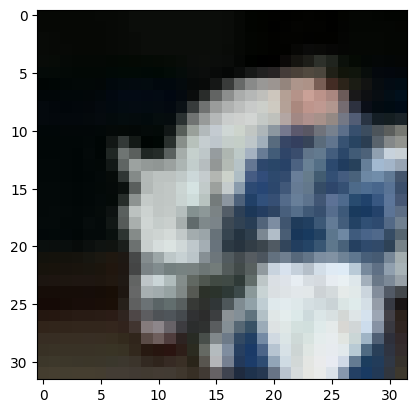

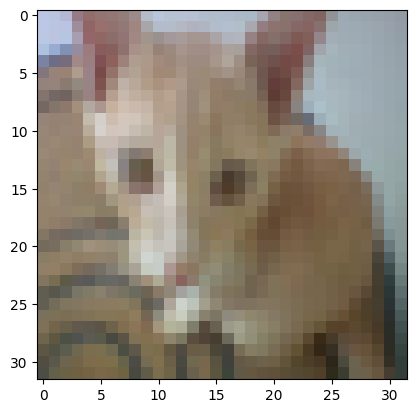

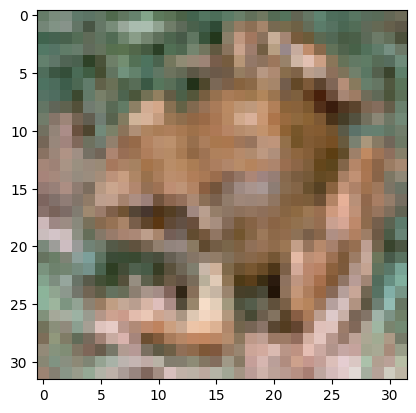

In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


# ---------------------------------
# 1. Define transforms
# ---------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2470, 0.2435, 0.2616]
    )
])

# ---------------------------------
# 2. Load CIFAR-10 dataset
# ---------------------------------
train_dataset = datasets.CIFAR10(
    root="data",
    train=True,
    transform=transform,
    download=False
)

test_dataset = datasets.CIFAR10(
    root="data",
    train=False,
    transform=transform,
    download=False
)

# ---------------------------------
# 3. Create DataLoaders
# ---------------------------------
batch_size = 64

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

# ---------------------------------
# 4. Splitting
# ---------------------------------
def imshow(img):
    # Unnormalize
    img = img * torch.tensor([0.2470, 0.2435, 0.2616]).view(3,1,1) + torch.tensor([0.4914, 0.4822, 0.4465]).view(3,1,1)
    img = img.clamp(0, 1)
    plt.imshow(img.permute(1, 2, 0))  # convert from C,H,W to H,W,C
    plt.show()

# Grab one batch
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show the first 4 images
for i in range(4):
    imshow(images[i])
